In [728]:
import matplotlib.pylab as plt
import numpy as np
from osgeo import gdal
import osr

# from scipy import misc
# raster = misc.imread('HillslopeOnlyVeg.tif')

In [729]:
%matplotlib inline

In [730]:
image = np.flipud(plt.imread('../FourierWindowMethodMATLAB/ExamplePattern2.tiff'))
image[image != 0] = 1
image = image[31:-31, 31:-31]
TI = image.copy()[:100, 100:200]

In [731]:
# TI = np.ones((20, 20))
# TI[:, ::4]  = 0
# TI[:, 1::4]  = 0

In [732]:
import scipy.io as sio

In [733]:
rot = sio.loadmat('../FourierWindowMethodMATLAB/dir.txt')['dir']
rot =   - rot[31:-31, 31:-31]*180./np.pi
rot = rot - np.mean(rot[:100, 100:200])

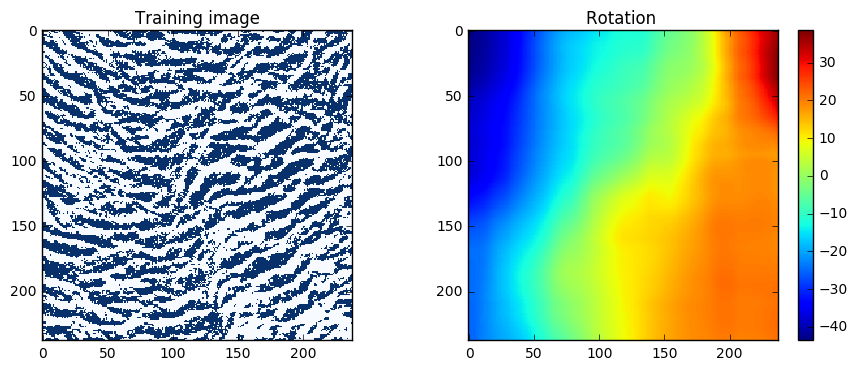

In [734]:
plt.figure(figsize = (11, 4))
plt.subplot(121)
plt.imshow(image,
           cmap='Blues', interpolation='none')
plt.title('Training image')

plt.subplot(122)
plt.imshow(rot, interpolation='none')
plt.colorbar()
plt.title('Rotation ')


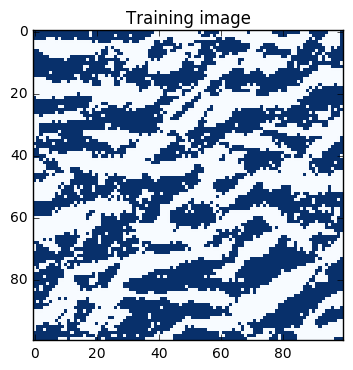

In [735]:

plt.figure(figsize = (11, 4))

plt.subplot(121)
plt.imshow(TI,
           cmap='Blues', interpolation='none')
plt.title('Training image')


# plt.subplot(122)
# plt.imshow(rot[:25, 100:125], interpolation='none')
# plt.colorbar()
# plt.title('Rotation ')



In [736]:
Nx = TI.shape[1]
Ny = TI.shape[0]

In [737]:
f = open("ti.gslib", "w")
f.write('{0} {0} 1 1 1 1 0 0 0\n'.format(Nx, Ny))
f.write('1\n')
f.write('veg\n')
count = 0

for j in range(Ny):
    for i in range(Nx):
        f.write('{}\n'.format(str(TI[j,i])))
        count+= 1

In [738]:
f = open("rot.gslib", "w")
f.write('{0} {0} 1 1 1 1 0 0 0\n'.format(rot.shape[0], rot.shape[1]))
f.write('1\n')
f.write('veg \n')
count = 0

for j in range(rot.shape[0]):
    for i in range(rot.shape[1]):
        f.write('{}\n'.format(str(rot[j,i])))
        count += 1

for j in range(rot.shape[0]):
    for i in range(rot.shape[1]):
        f.write('{}\n'.format(str(rot[j,i])))
        count += 1
                

In [739]:
# f = open("rot.gslib", "w")
# f.write('{0} {0} 1 1 1 1 0 0 0\n'.format(rot.shape[0], rot.shape[1]))
# f.write('1\n')
# f.write('veg\n')
# count = 0

# for j in range(rot.shape[0]):
#     for i in range(rot.shape[1]):
#         f.write('{}\n'.format(str(rot[j,i])))
#         count += 1
        

In [740]:
count/238.

476.0

In [741]:
def openfile(fname):
    f =  open(fname, 'r')

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]

    Nx = int(a[0])
    Ny = int(a[1])
    Nz = int(a[2])

    Sx = float(a[3])
    Sy = float(a[4])
    Sz = float(a[5])

    Ox = float(a[6])
    Oy = float(a[7])
    Oz = float(a[8])

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]
    nvar = int(a[0])

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]
    name_of_variable_1 = (a[0])
    print name_of_variable_1,
    
    facies = np.zeros([Nx, Ny])
    for i in range(Ny):
        for j in range(Nx):
            facies[i, j] = int(f.next().split()[0])
            
    return facies, Nx, Ny

veg_real00000

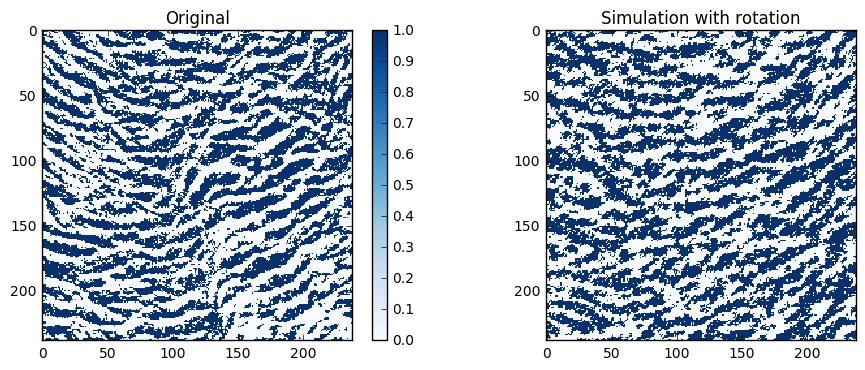

In [747]:
rot_test, nx,ny = openfile("rotate/rveg_real00000.gslib")

fig = plt.figure(figsize = (11, 4))

plt.subplot(121)
plt.imshow(image,  cmap = 'Blues',  interpolation = 'none')
plt.colorbar()
plt.title('Original')

plt.subplot(122)
plt.imshow(rot_test, cmap = 'Blues', interpolation  = 'none')
plt.title('Simulation with rotation')


veg_real00000

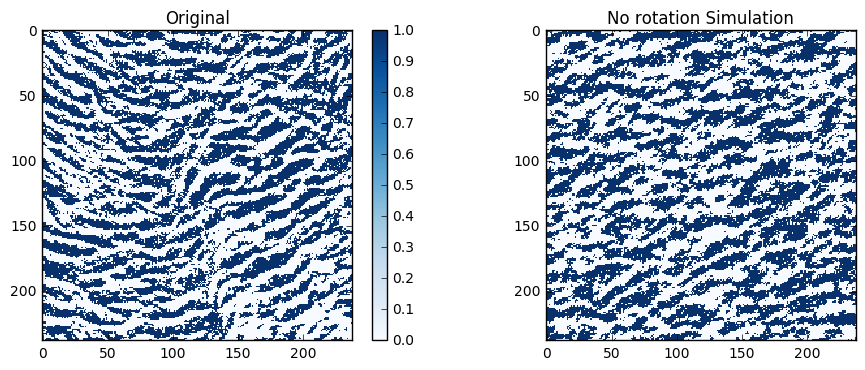

In [746]:
rot_test, nx,ny = openfile("rotate/veg_real00000.gslib")

fig = plt.figure(figsize = (11, 4))

plt.subplot(121)
plt.imshow(image,  cmap = 'Blues',  interpolation = 'none')
plt.colorbar()
plt.title('Original')

plt.subplot(122)
plt.imshow(rot_test, cmap = 'Blues', interpolation  = 'none')
plt.title('No rotation Simulation')
